In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from make_dataset import renamed_columns_en, process_raw, clean_na, make_dataset, abbreviation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#bring in the six packs
df_train = pd.read_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/northeast.csv')

In [4]:
abs = abbreviation
print(abs)

['date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [5]:
#changing column names
if len(abs)<27:
    abs.insert(0, "index")
df_train.columns = abs
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [6]:
num_rows = len(df_train['tmax'])

In [7]:
df_train.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

In [8]:
df_train.replace(-9999, np.nan, inplace=True)

In [9]:
new_df = pd.DataFrame({col: [] for col in abbreviation})
new_df.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

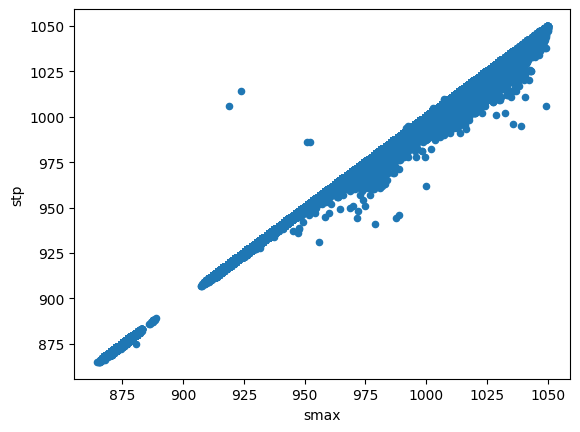

In [10]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');


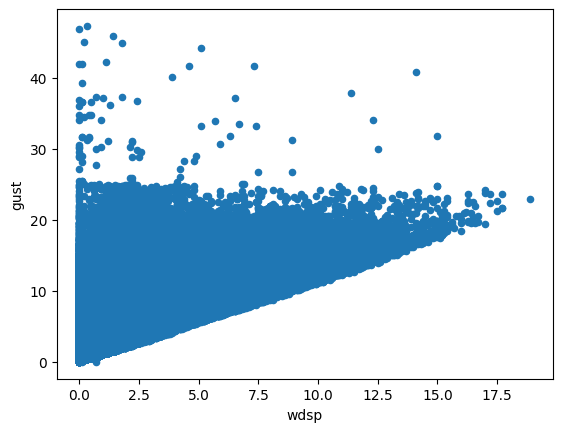

In [11]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([df_train['gust'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [12]:
gust_out_liers = []
for i in range(num_rows):
    y = df_train['gust'][i]
    if y > 27:
        gust_out_liers.append(i)

new_df = df_train.drop(gust_out_liers)
new_df = new_df.reset_index(drop=True)


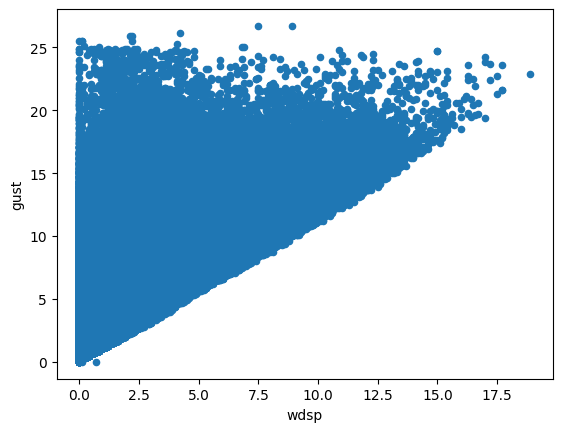

In [13]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([new_df['gust'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [14]:
stp_smax_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    x = new_df['smax'][i]
    y = new_df['stp'][i]
    if y > x + 15:
        stp_smax_out_liers.append(i)

new_df = new_df.drop(stp_smax_out_liers)
new_df = new_df.reset_index(drop=True)

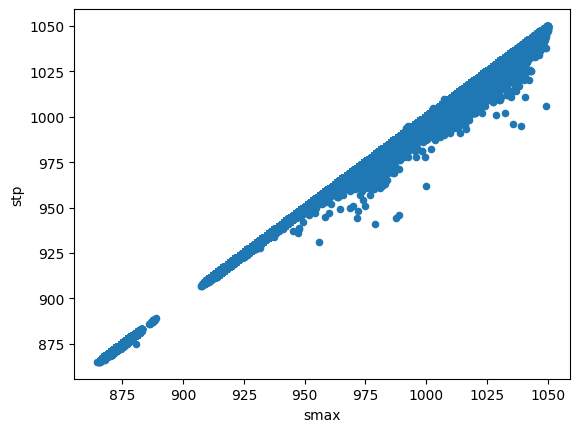

In [15]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([new_df['stp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='stp');

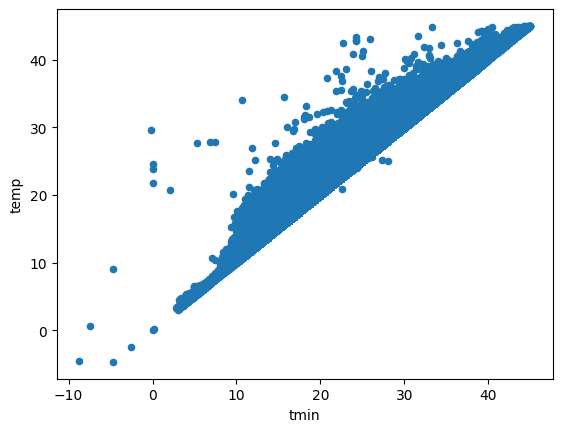

In [16]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

In [17]:
temp_tmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['temp'][i]
    x = new_df['tmin'][i]
    if y > x + 20:
        temp_tmin_out_liers.append(i)

new_df = new_df.drop(temp_tmin_out_liers)
new_df = new_df.reset_index(drop=True)

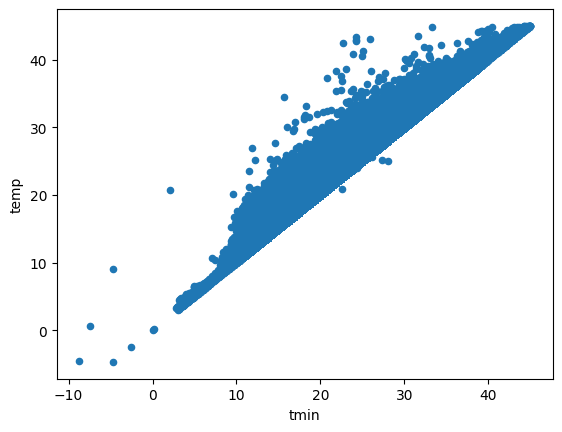

In [18]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

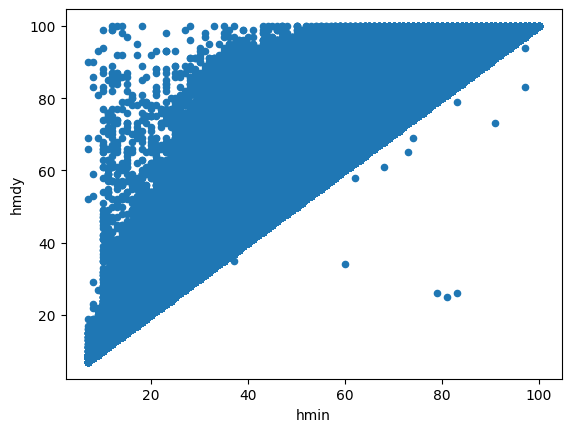

In [19]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [20]:
hmdy_hmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['hmdy'][i]
    x = new_df['hmin'][i]
    if y < x - 3:
        hmdy_hmin_out_liers.append(i)

new_df = new_df.drop(hmdy_hmin_out_liers)
new_df = new_df.reset_index(drop=True)

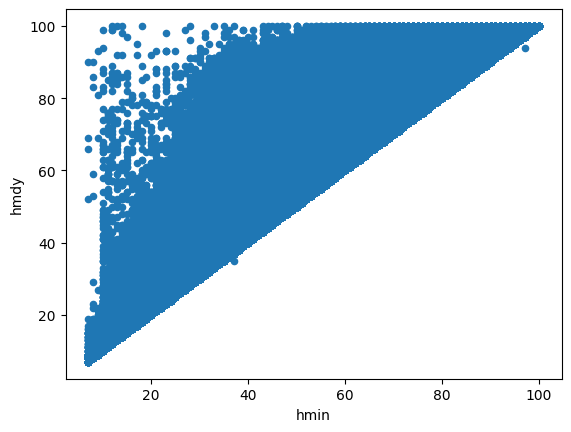

In [21]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [22]:
missing_percentages = new_df.isna().mean() * 100
print(missing_percentages)

index     0.000000
date      0.000000
hour      0.000000
prcp     15.667363
stp      11.361485
smax     11.410535
smin     11.409539
gbrd     51.074745
temp     11.338614
dewp     13.031589
tmax     11.325989
tmin     11.309981
dmax     13.001812
dmin     13.057529
hmax     13.004500
hmin     13.088800
hmdy     12.990454
wdct     13.963632
gust     13.530253
wdsp     13.538931
regi      0.000000
prov      0.000000
wsnm      0.000000
inme      0.000000
lat       0.000000
lon       0.000000
elvt      0.112319
dtype: float64


In [23]:
df_mean =  new_df.drop(['index', 'hour', 'gbrd', 'smax', 'smin', 'tmin', 'tmax', 'dmax', 'dmin', 'hmax', 'hmin', 'dewp', 'gust'], axis=1)
#df_mean =  df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt'])[['prcp', 'temp', 'hmdy', 'wdct', 'wdsp', 'stp']].mean()
df_mean = df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt']).agg({'prcp': 'mean', 'stp': 'mean', 'temp': 'mean', 'hmdy': 'mean', 'wdct': 'mean', 'wdsp': 'mean'}).reset_index()

In [24]:
missing_percentages = df_mean.isna().mean() * 100
print(missing_percentages)

date     0.000000
inme     0.000000
regi     0.000000
prov     0.000000
wsnm     0.000000
lat      0.000000
lon      0.000000
elvt     0.000000
prcp    12.704018
stp      7.980165
temp     7.967605
hmdy     8.828892
wdct    10.633472
wdsp    10.211916
dtype: float64


In [25]:
df_sorted = df_mean.sort_values(by=['inme', 'date'])

In [26]:
df_interpolated = df_sorted.interpolate()
missing_percentages = df_interpolated.isna().mean() * 100
print(missing_percentages)

date    0.000000
inme    0.000000
regi    0.000000
prov    0.000000
wsnm    0.000000
lat     0.000000
lon     0.000000
elvt    0.000000
prcp    0.000000
stp     0.000000
temp    0.000148
hmdy    0.000148
wdct    0.000148
wdsp    0.000148
dtype: float64


In [27]:
df_interpolated.to_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/northeast_new.csv', index=False)

In [28]:
print("hi")


hi
